In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_plotters_animators import *
from scipy.constants import c, pi
from scipy.fftpack import ifft,fft,fftshift,ifftshift


/home/john/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
class Sim_wind(object):
    def __init__(self,fv,t):
        self.fv = fv
        self.t = t

In [3]:

def dbm2w(dBm):
    """This function converts a power given in dBm to a power given in W.
       Inputs::
           dBm(float): power in units of dBm
       Returns::
           Power in units of W (float)
    """
    return 1e-3*10**((dBm)/10.)


def w2dbm(W,floor=-100):
    """This function converts a power given in W to a power given in dBm.
       Inputs::
           W(float): power in units of W
       Returns::
           Power in units of dBm(float)
    """
    if type(W) != np.ndarray:
    	if W>0:
    		return 10. * np.log10(W) + 30
    	elif W==0:
    		return floor
    	else:
    		raise(ZeroDivisionError)
    a = 10. * (np.ma.log10(W)).filled(floor/10-3) + 30
    return a


In [4]:
file_path = 'output_dump/output0/data'
#file_path = 'output_dump/output0/data/portA/'
#file_path = 'output_dump/output0/data/portB/'

In [5]:
value = '/992'

In [6]:
D = read_variables(value, file_path)

In [7]:
nm, t, fv, power_watts,which, u,U = D['nm'], D['t'], D['fv'],D['power_watts'], D['which'], D['u'],D['U']
sim_wind = Sim_wind(fv,t)

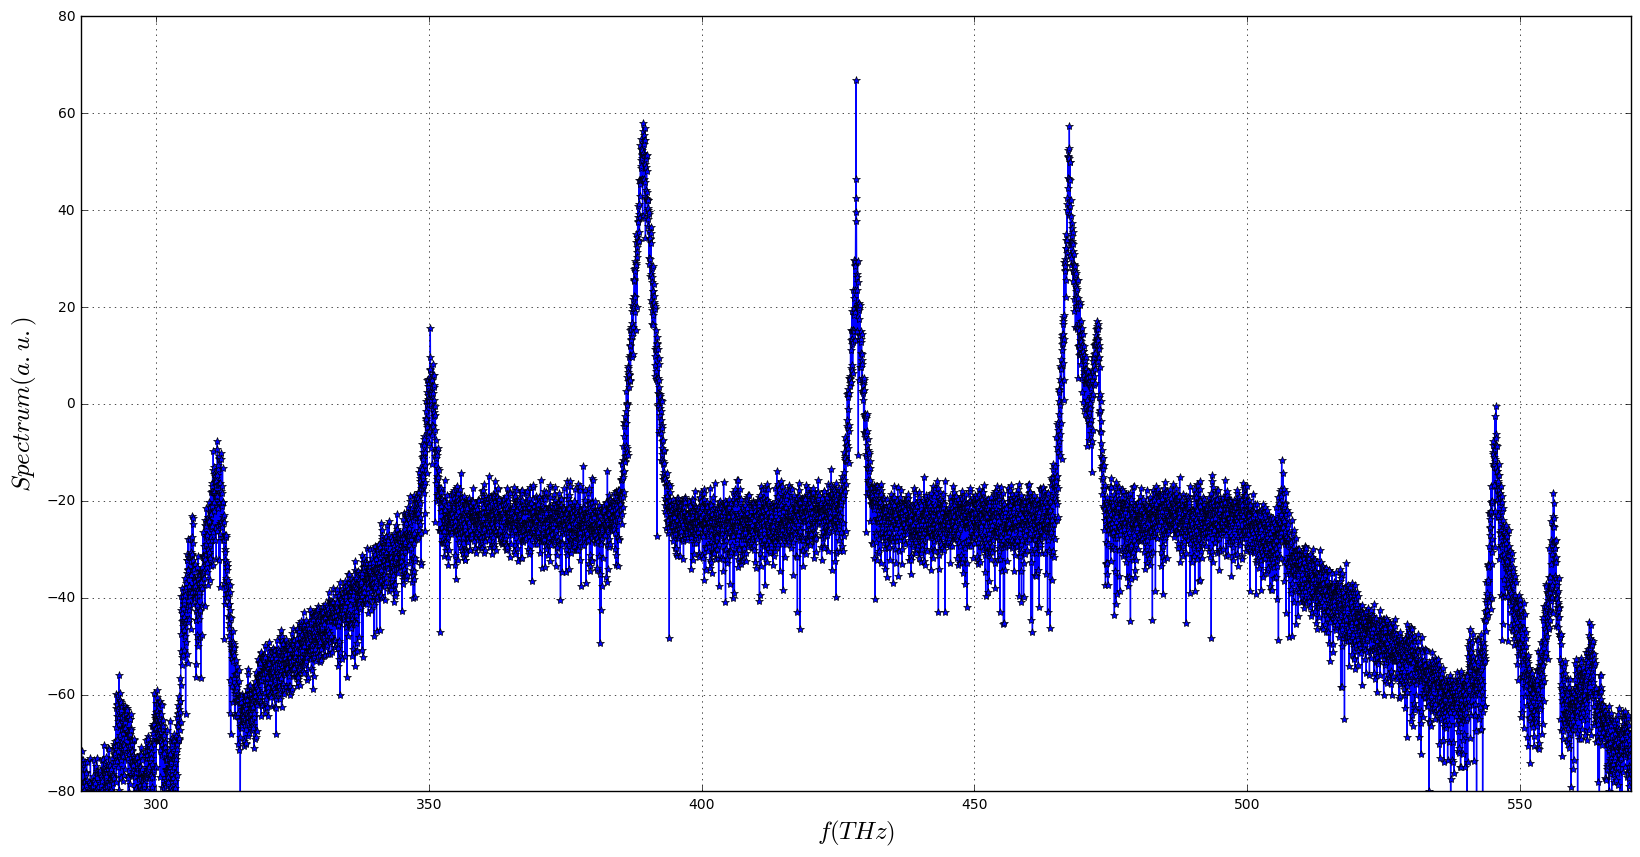

In [8]:
fig = plt.figure(figsize=(20.0, 10.0))
for ii in range(nm):
    plt.plot(sim_wind.fv,np.real(power_watts[:,ii,which]),'-*',label='mode'+str(ii))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel(r'$f (THz)$',fontsize=18)
plt.ylabel(r'$Spectrum (a.u.)$',fontsize=18)
plt.xlim([np.min(sim_wind.fv),np.max(sim_wind.fv)])
plt.ylim([-80,80])
plt.grid()
plt.show()

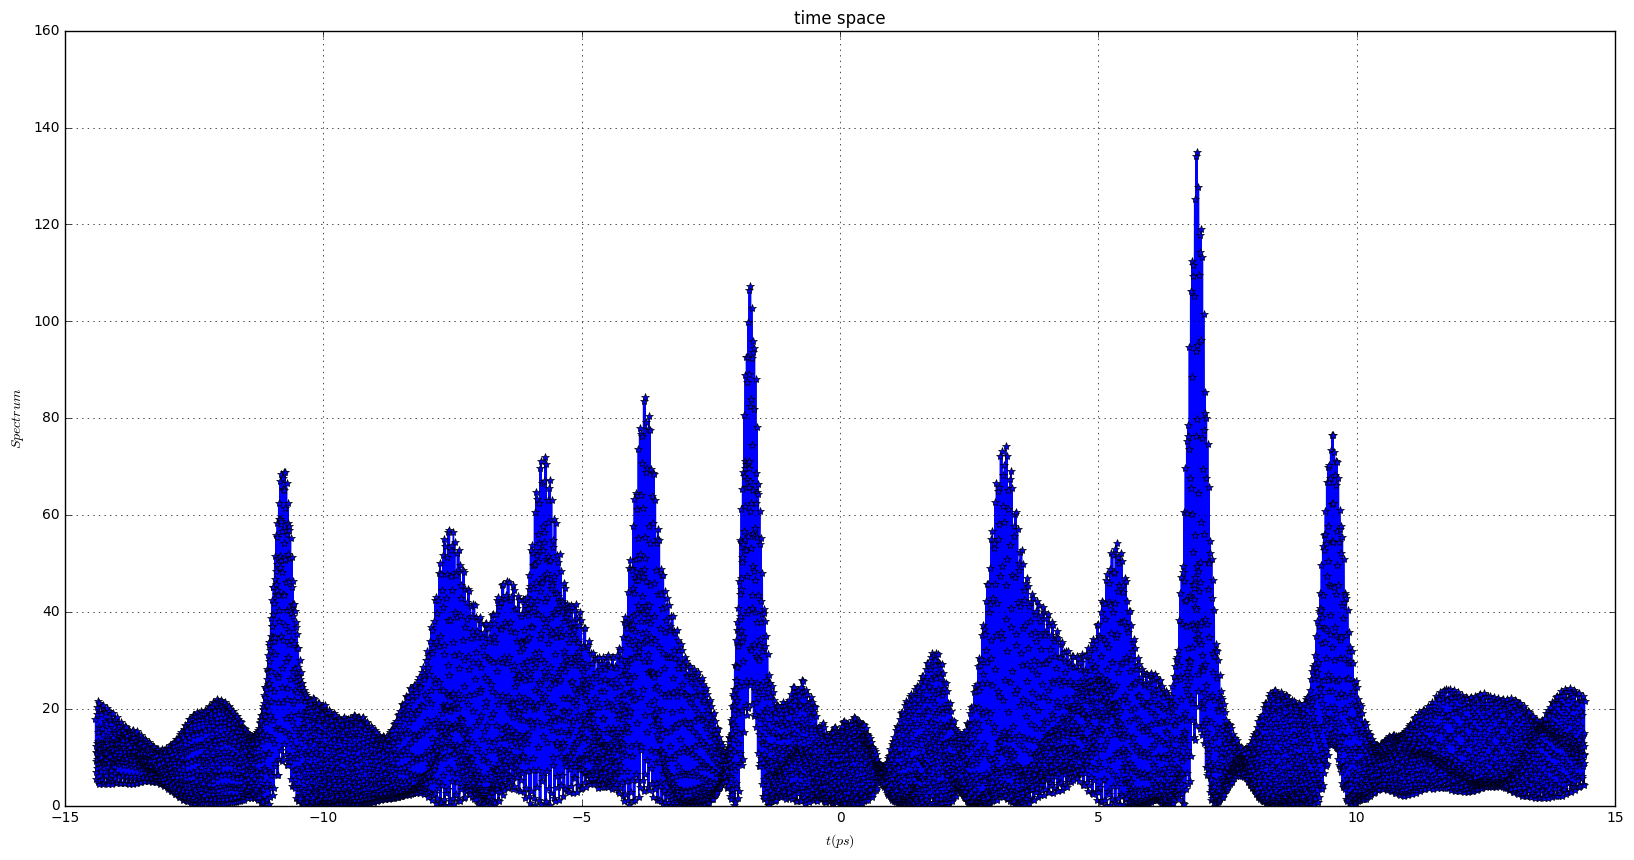

In [9]:
fig = plt.figure(figsize=(20.0, 10.0))
for ii in range(nm):
    plt.plot(sim_wind.t,np.abs(u[:,ii,which])**2,'*-',label='mode'+str(ii))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title("time space")
plt.grid()
plt.xlabel(r'$t(ps)$')
plt.ylabel(r'$Spectrum$')
plt.ylim([0,160])
plt.show()

In [72]:
bet_freq = (380,398)

In [73]:
class multi(object):
    def __init__(self,bet_freq):
        self.bet_freq = bet_freq
    def step(self,fv):
        out = []
        for f in fv:
            if self.bet_freq[0] <= f <=self.bet_freq[1]:
                out.append(1)
            else: 
                out.append(0)
        return np.asanyarray(out)


In [74]:
m = multi(bet_freq)
mult= m.step(fv)

In [75]:
U_signal = U[:,0,-1] * mult

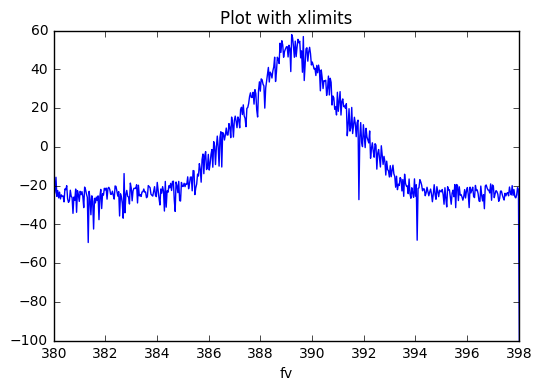

In [76]:
plt.plot(fv,w2dbm(np.abs(U_signal)**2))
plt.xlabel('fv')
plt.xlim(bet_freq)
plt.title('Plot with xlimits')
plt.show()

In [77]:
dt = t[1] - t[0]
u = ifft(ifftshift(U_signal,axes=(0,))/dt)

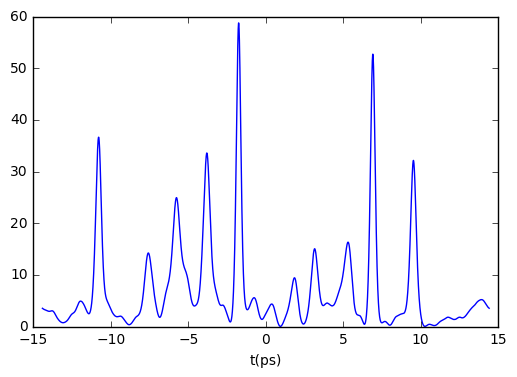

In [78]:
plt.plot(t,np.abs(u)**2)
plt.xlabel('t(ps)')
plt.show()

In [1]:
gama = 10e-3
L = 18
T = 0.76

In [2]:
import numpy as np

In [5]:
P0 = (1/(gama*L))*np.arccosh(1/T**0.5)

In [6]:
P0

2.9773669420058471

In [19]:
from scipy.integrate import simps
from scipy.fftpack import fft, ifft
from numpy.fft import fftshift, ifftshift
import matplotlib.pyplot as plt

In [32]:
x = np.linspace(-1,1,512)

In [33]:
y = 3*np.ones_like(x)

In [34]:
fy = fftshift(fft(y))


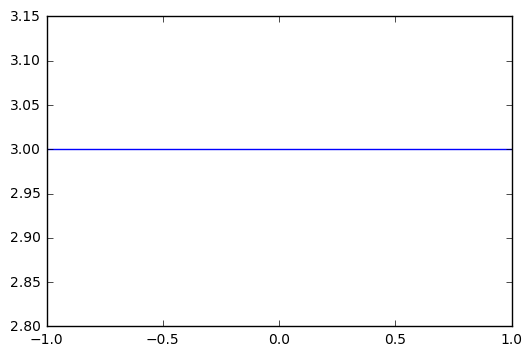

In [35]:
f= plt.figure()
plt.plot(x,y)
plt.show()

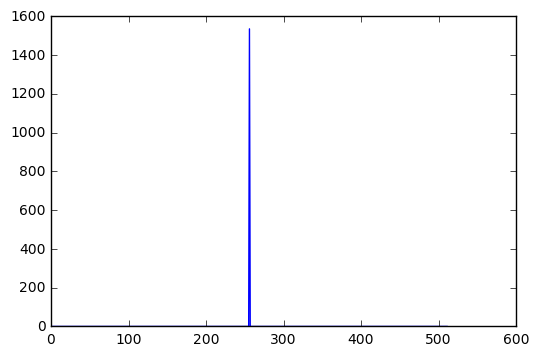

In [36]:
f= plt.figure()
plt.plot(np.abs(fy))
plt.show()

In [55]:
simps(np.abs(fy))

1536.0

In [51]:
x = None; y =None

In [52]:
if x is None and y is not None:
    print(x,y)

In [54]:
2**13//2


4096

In [3]:
a = np.zeros([10,2,15
             ])

In [57]:
import h5py
f = h5py.File('filename.h5','a')
for i in D:
    f.create_dataset(str(10)+'/'+str(i), data=D[i])
f.close()

In [54]:
with h5py.File('filename.hdf5','r') as ff:
    D = {}
    for i in ff.keys():
        D[str(i)] = ff.get(str(i)).value

AttributeError: 'Group' object has no attribute 'value'

In [17]:
class test(object):
    def __init__(self,D):
        for k, v in D.items():
            setattr(self, k, v)

In [39]:
t = test(D)

In [40]:
t.a

1

In [31]:
rm filename.hdf5

In [19]:
from functions import *
from data_plotters_animators import *

In [36]:
del D

In [38]:
D

{'a': 1, 'b': 2, 'c': 3}

In [1]:
import numpy as np 
import h5py

In [95]:
D = {'a' : 1, 'b': 2, 'c': 3}

In [96]:
pos = ('/0', '/1', '/2', '/3','/PortA', '/PortB')

In [98]:
for i in range(10):
    i = str(i)
    for p in pos:
        layer = i + p
        save_variables('draft', layer, filepath = 'output/data',a = 1, b = 2, c = 3)

OSError: Unable to create file (File exists)

In [100]:
f.get('0/0')

<HDF5 group "/0/0" (3 members)>

In [122]:
def save_variables(filename, layers,filepath = '',**variables):
    with h5py.File(filepath + filename +'.hdf5','a') as f:
        for i in (variables):
            f.create_dataset(layers+'/'+str(i), data=variables[i])
    return None

In [123]:
def read_variables(filename,layer,filepath=''):
    with h5py.File(filepath+str(filename)+'.hdf5','r') as ff:
        a = f.get(layer)
        D = {}
        for i in a.keys():
            D[str(i)] = a.get(str(i)).value
    return D

In [124]:
DD = read_variables('datadraft','0/0/',filepath = 'output/')

OSError: Unable to open file (Unable to open file: name = 'output/datadraft.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [125]:
f = h5py.File('output/dat')

In [127]:
f = h5py.File('output/datadraft.hdf5', 'w')

In [129]:
f.create_dataset('hello', data=1)

<HDF5 dataset "hello": shape (), type "<i8">

In [133]:
dir(f)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_d',
 '_e',
 '_id',
 '_lapl',
 '_lcpl',
 'attrs',
 'clear',
 'close',
 'copy',
 'create_dataset',
 'create_group',
 'driver',
 'fid',
 'file',
 'filename',
 'flush',
 'get',
 'id',
 'items',
 'keys',
 'libver',
 'mode',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'require_dataset',
 'require_group',
 'setdefault',
 'upd

In [134]:
import pandas as pan

In [137]:
a = pan.read_hdf('output/datadraft.hdf5')

ValueError: No dataset in HDF5 file.

In [139]:
D = {'P_P' : 5, 'P_S' : 10, 'CE' : 100}

In [6]:
import numpy as np

In [7]:
A = np.array([5,10,100]).T

In [8]:
B = A[:]*2

B = B.T

In [9]:
A = np.array([5,10,100]).T
a = pan.DataFrame(A, index = ['P_p', 'P_s', 'CE']).T

In [10]:
a

,P_p,P_s,CE
0,5,10,100


In [11]:
b =  pan.DataFrame(B, index = ['P_p', 'P_s', 'CE']).T

In [201]:
ab = a.append(b, ignore_index=True)

In [209]:
store = ab.to_hdf('draft.hdf5',key='a')

In [1]:
import pandas as pan


In [2]:
ab = pan.read_hdf('draft.hdf5')

In [3]:
ab

,P_p,P_s,CE
0,5,10,100
1,10,20,200
2,5,10,100
3,10,20,200
4,5,10,100
5,10,20,200
6,5,10,100
7,10,20,200


In [4]:
ab = ab.append(ab, ignore_index= True)

In [5]:
ab.to_hdf('draft.hdf5',key='a')

/home/john/miniconda3/lib/python3.5/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [1]:
import numpy as np
import pandas as pd

In [81]:
def read_write_CE_table(filename,var, P_p, P_s, f_p, f_s, CE,var2 = 'CE',file_path=''):
    
    """ Given values of the parameters this function uses pandas to open an
        hdf5 file and append to the dataframe there. It also returns the full data
        for post-processing. 
        
        It returns a tuple of 2 numpy arrays the first with the variable var and the second with
        the conversion efficiencty (as default).
    """
    
    A = np.array([P_p, P_s, f_p, f_s, CE]).T
    a = pd.DataFrame(A, index = ['P_p', 'P_s',' f_p', 'f_s', 'CE']).T
    try:
        ab = pd.read_hdf(file_path+filename+'.hdf5')
        ab = ab.append(a, ignore_index=True)
    except IOError:
        ab = a
        pass
    store = ab.to_hdf(file_path+filename+'.hdf5',key='a')
    
    return ab[var].as_matrix(),ab[var2].as_matrix()

In [85]:
ab = read_write_CE_table('draft_CE','P_p', 11., 3., 100.,200., 0.10, file_path='output/data/')

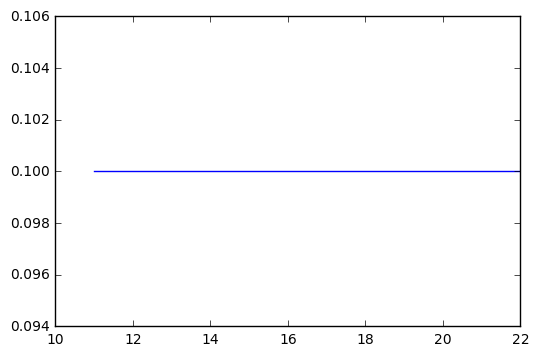

In [86]:
import matplotlib.pyplot as plt
plt.plot(ab[0], ab[1])
plt.show()

In [35]:
a = ab.as_matrix()

In [39]:
a[:,0]

array([ 11.,  11.,  11.,  11.])